<a href="https://colab.research.google.com/github/BryanVerduga/Proyecto1_Verduga/blob/main/Tarea4(series_de_tiempo%2C_corregida).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Bryan Verduga

Crea una jupyter notebook con una data sintetica u otra a elección que simule una serie de tiempo. Usa cada función expuesta anteriormente y comenta los resultados

In [5]:
!pip install prophet


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6fjdcfyf/trbgucou.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6fjdcfyf/fgb895x3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76754', 'data', 'file=/tmp/tmp6fjdcfyf/trbgucou.json', 'init=/tmp/tmp6fjdcfyf/fgb895x3.json', 'output', 'file=/tmp/tmp6fjdcfyf/prophet_modelag6nc6o1/prophet_model-20230731014446.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:44:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:44:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


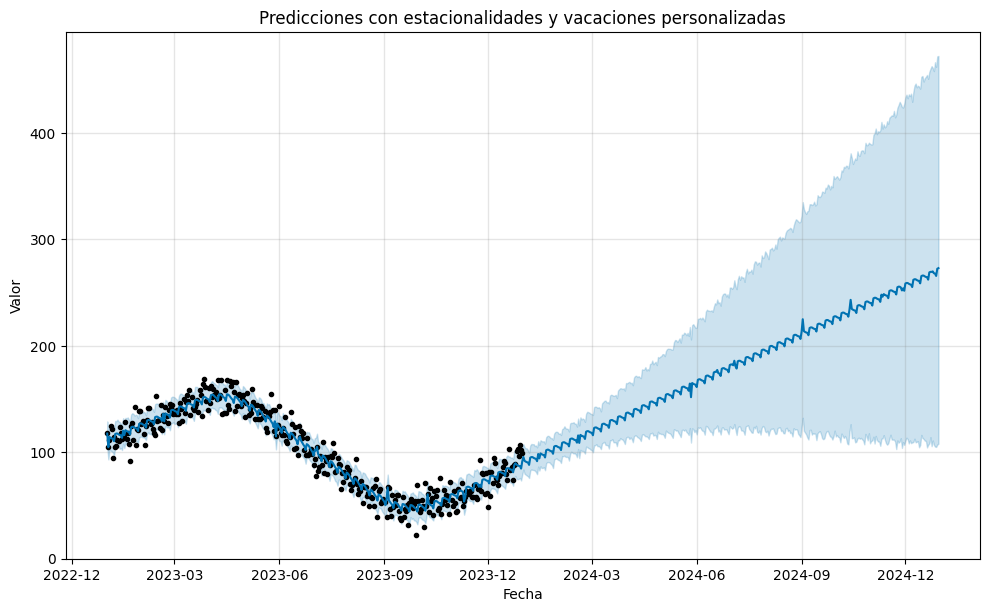

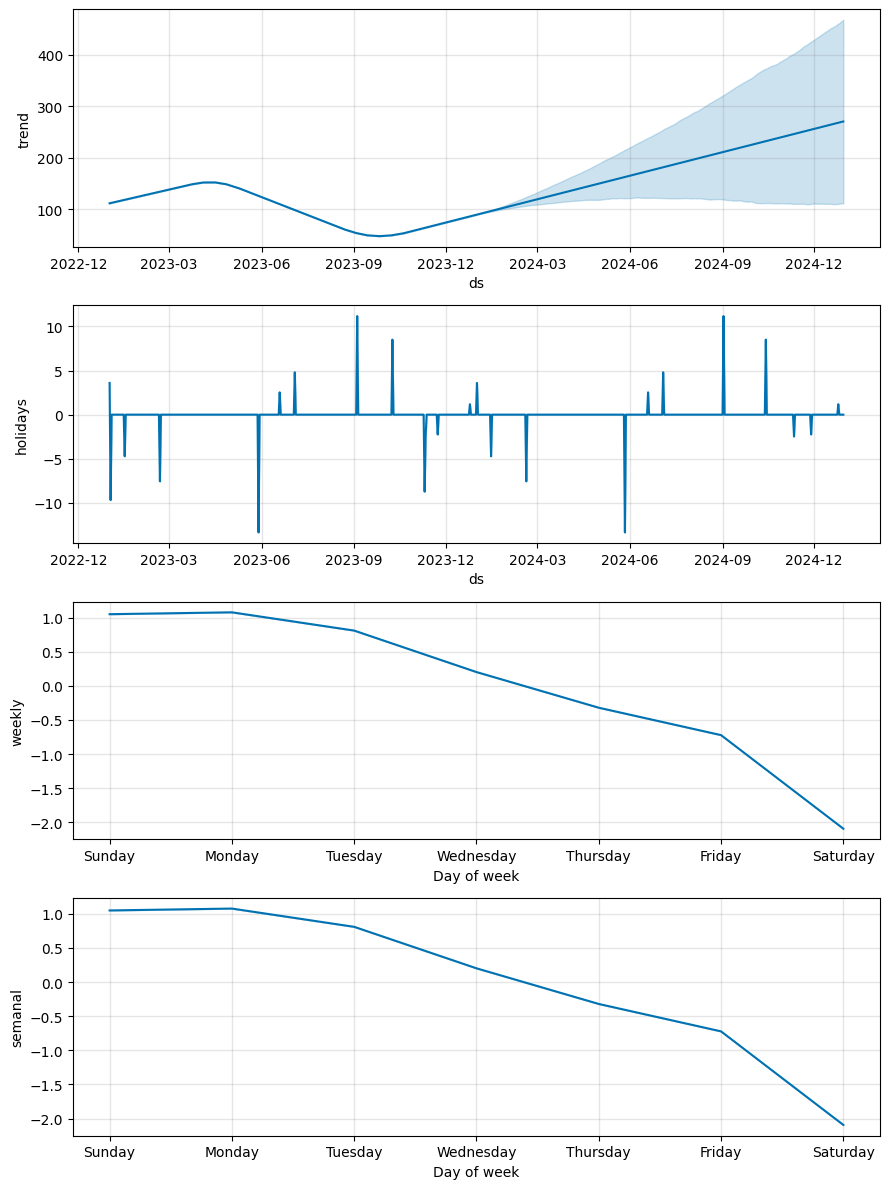

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

#creamos fechas para 365 dias
fechas = pd.date_range(start='2023-01-01', periods=365, freq='D')

#creamos datos son sinuidal y ruido aleatorio
import numpy as np
np.random.seed(0)
valores = 100 + 50 * np.sin(np.arange(365) * (2 * np.pi) / 365) + np.random.normal(0, 10, 365)

#creamos data frame
datos = pd.DataFrame({'ds': fechas, 'y': valores})

#creamos y ajustamos el modelo Prophet
modelo = Prophet()

#agregamos estacionalidad personalizada (por ejemplo, estacionalidad semanal)
modelo.add_seasonality(name='semanal', period=7, fourier_order=3)

#agregamos las vacaciones de un país (por ejemplo, EE. UU.)
modelo.add_country_holidays(country_name='US')

#ajustamos el modelo con las estacionalidades y las vacaciones personalizadas
modelo.fit(datos)

#generamos fechas futuras para las predicciones
fechas_futuras = modelo.make_future_dataframe(periods=365)

#realizamos las predicciones
predicciones_personalizadas = modelo.predict(fechas_futuras)

#visualizamos los resultados

#graficos
fig3 = modelo.plot(predicciones_personalizadas)
plt.title("Predicciones con estacionalidades y vacaciones personalizadas")
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.show()

#graficos resultados
fig4 = modelo.plot_components(predicciones_personalizadas)
plt.show()
